# Bayes Theorem

In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule), named after Reverend Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to the event. [1](https://plato.stanford.edu/archives/spr2019/entries/bayes-theorem/)

#### $$P(A|B) = \frac {P(B|A)P(A)}{P(B)}$$

I'm a visual learner. My favourite intuitive example of Bayes Theorem is this [using lego bricks](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego):

<img src="lego-probability-space.jpeg" width="400" height="400">

The image shows a 60 (6 * 10) lego unit area
 - 40 blue areas
 - 20 red areas
 - 6 intersecting yellow areas. 

We can work through the maths to determine the probabilities and conditional probabilities of each colour.

In [9]:
pBlue = 40/60
pRed = 20/60
pYellow = 6/60
pYellowRed = 4/20 # probabiity of Yellow given Red
pYellowBlue = 2 / 40 # probabiity of Yellow given Blue

print('Cond p(Yellow|Red) = {:.3f}'.format(pYellowRed))
print('Cond p(Yellow|Blue) = {:.3f}'.format(pYellowBlue))

Cond p(Yellow|Red) = 0.200
Cond p(Yellow|Blue) = 0.050


We now some baseline information for the probability and conditional probility of landing on each colour within the Legosphere. We can apply Bayes theorem to generate estimates for "if we land on a yellow brick, what is the probability its red underneath?"

$$P(A|B) = \frac {P(B|A)P(A)}{P(B)}$$

$$P(Red|Yellow) = \frac {P(Yellow|Red)P(Red)}{P(Yellow)}$$

In [14]:
pRedYellow = pYellowRed*pRed/pYellow
print('Cond p(Red|Yellow) = {:.3f}'.format(pRedYellow))

Cond p(Red|Yellow) = 0.667


### [Example: Evaluating New Marketing Campaigns Using Bayesian Inference ](https://www.datascience.com/blog/introduction-to-bayesian-inference-learn-data-science-tutorials)

Assume that we run an ecommerce platform for clothing and in order to bring people to our site, we deploy several digital marketing campaigns. These campaigns feature various ad images and captions, and are presented on a number of social networking websites. We want to present the ads that are the most successful. For the sake of simplicity, we can assume that the most successful campaign is the one that results in the highest click-through rate: the ads that are most likely to be clicked if shown.

We introduce a new campaign called "facebook-yellow-dress," a campaign presented to Facebook users featuring a yellow dress. The ad has been presented to 10 users so far, and 7 of the users have clicked on it. We would like to estimate the probability that the next user will click on the ad. 

By encoding a click as a success and a non-click as a failure, we're estimating the probability θ that a given user will click on the ad. Naturally, we are going to use the campaign's historical record as evidence. Because we are considering unordered draws of an event that can be either 0 or 1, we can infer the probability θ by considering the campaign's history as a sample from a binomial distribution, with probability of success θ. Traditional approaches of inference consider multiple values of θ and pick the value that is most aligned with the data. This is known as maximum likelihood, because we're evaluating how likely our data is under various assumptions and choosing the best assumption as true. More formally:

 argmaxθp(X |θ), where X is the data we've observed.

Here, p(X |θ) is our likelihood function; if we fix the parameter θ, what is the probability of observing the data we've seen? Let's look at the likelihood of various values of θ given the data we have for facebook-yellow-dress:

In [2]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,7)

In [3]:
def likelihood(theta, n, x):
    """
    likelihood function for a binomial distribution

    n: [int] the number of experiments
    x: [int] the number of successes
    theta: [float] the proposed probability of success
    """
    return (factorial(n) / (factorial(x) * factorial(n - x))) \
            * (theta ** x) * ((1 - theta) ** (n - x))

In [4]:
#the number of impressions for our facebook-yellow-dress campaignn_impressions = 10.
n_impressions = 10

#the number of clicks for our facebook-yellow-dress campaign
n_clicks = 7

#observed click through rate
ctr = n_clicks / n_impressions

#0 to 1, all possible click through rates
possible_theta_values = np.arange(0.01,1.0,0.01)

#evaluate the likelihood function for possible click through rates
likelihoods = list(map(lambda theta: likelihood(theta, n_impressions, n_clicks), possible_theta_values))

#pick the best theta
mle = possible_theta_values[np.argmax(likelihoods)]

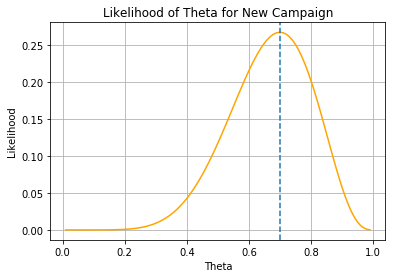

In [6]:
#plot
f, ax = plt.subplots(1)
ax.plot(possible_theta_values, likelihoods, color='orange')
ax.axvline(mle, linestyle = "--")

ax.set_xlabel("Theta")
ax.set_ylabel("Likelihood")
ax.grid()
ax.set_title("Likelihood of Theta for New Campaign")
plt.show()

Of the 10 people we showed the new ad to, 7 of them clicked on it. So naturally, our likelihood function is telling us that the most likely value of theta is 0.7. However, some of our analysts are skeptical. The performance of this campaign seems extremely high given how our other campaigns have done historically. Let's overlay this likelihood function with the distribution of click-through rates from our previous 100 campaigns:

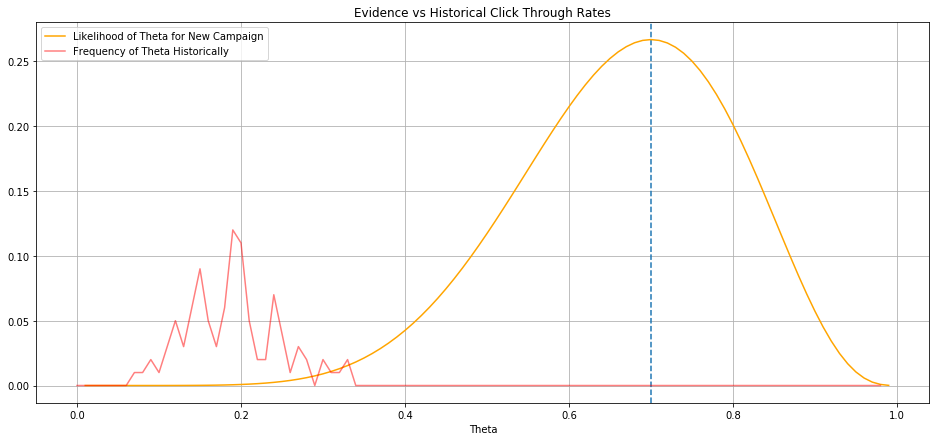

In [10]:
plt.rcParams['figure.figsize'] = (16, 7)
import numpy as np
import pandas as pd

true_a = 11.5
true_b = 48.5

#number of marketing campaigns
N = 100

#randomly generate "true" click through rate for each campaign
p = np.random.beta(true_a,true_b, size=N)

#randomly pick the number of impressions for each campaign
impressions = np.random.randint(1, 10000, size=N)

#sample number of clicks for each campaign
clicks = np.random.binomial(impressions, p).astype(float)
click_through_rates = clicks / impressions

#plot the histogram of previous click through rates with the evidence#of the new campaign
f, ax = plt.subplots(1)
ax.axvline(mle, linestyle = "--")
ax.plot(possible_theta_values, likelihoods, color='orange')

zero_to_one = np.arange(0.0,1.0,0.01)
counts, bins = np.histogram(click_through_rates, bins=zero_to_one)
counts = counts / 100.
ax.plot(bins[:-1],counts, alpha = .5, color='red')
line1, line2, line3 = ax.lines
ax.legend((line2, line3), ('Likelihood of Theta for New Campaign'
                           , 'Frequency of Theta Historically')
                          , loc = 'upper left')

ax.set_xlabel("Theta")
ax.grid()
ax.set_title("Evidence vs Historical Click Through Rates")
plt.show()

Clearly, the maximum likelihood method is giving us a value that is outside what we would normally see. Perhaps our analysts are right to be skeptical; as the campaign continues to run, its click-through rate could decrease. Alternatively, this campaign could be truly outperforming all previous campaigns. We can't be sure. Ideally, we would rely on other campaigns' history if we had no data from our new campaign. And as we got more and more data, we would allow the new campaign data to speak for itself.

### [Beta](https://stats.stackexchange.com/a/47782/100439)
For our example, because we have related data and limited data on the new campaign, we will use an informative, empirical prior. We will choose a beta distribution for our prior for θ. The beta distribution is a 2 parameter (α, β) distribution that is often used as a prior for the θ parameter of the binomial distribution. Because we want to use our previous campaigns as the basis for our prior beliefs, we will determine α and β by fitting a beta distribution to our historical click-through rates. Below, we fit the beta distribution and compare the estimated prior distribution with previous click-through rates to ensure the two are properly aligned:

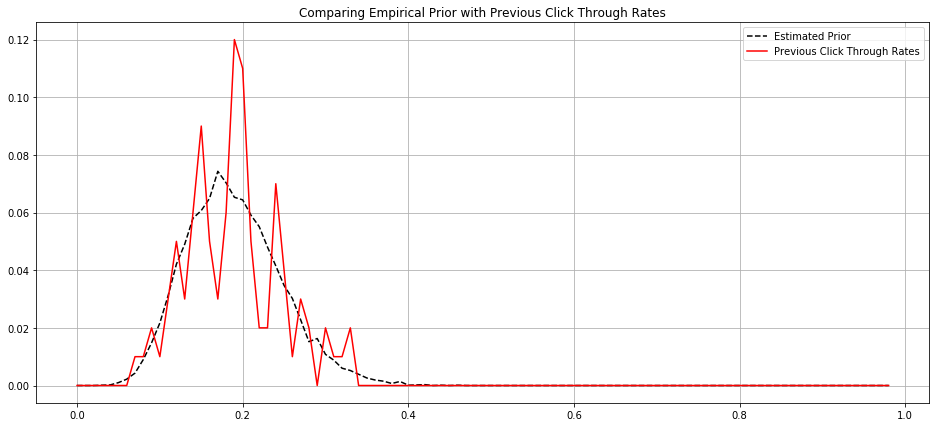

In [12]:
from scipy.stats import beta

#fit beta to previous CTRs
prior_parameters = beta.fit(click_through_rates
                            , floc = 0
                            , fscale = 1)

#extract a,b from fit
prior_a, prior_b = prior_parameters[0:2]

#define prior distribution sample from prior
prior_distribution = beta(prior_a, prior_b)

#get histogram of samples
prior_samples = prior_distribution.rvs(10000)

#get histogram of samples
fit_counts, bins = np.histogram(prior_samples, zero_to_one)

#normalize histogram
fit_counts = [x/fit_counts.sum() for x in fit_counts]

#plot
f, ax = plt.subplots(1)
ax.plot(bins[:-1], fit_counts, 'k--')

hist_ctr, bins = np.histogram(click_through_rates, zero_to_one)
hist_ctr = [x/hist_ctr.sum() for x in hist_ctr]

ax.plot(bins[:-1], hist_ctr, color='red')
estimated_prior, previous_click_through_rates = ax.lines
ax.legend((estimated_prior, previous_click_through_rates)
          ,('Estimated Prior', 'Previous Click Through Rates'))

ax.grid()
ax.set_title("Comparing Empirical Prior with Previous Click Through Rates")
plt.show()

### The priors
We find that the best values of α and β are 11.5 and 48.5, respectively. The beta distribution with these parameters does a good job capturing the click-through rates from our previous campaigns, so we will use it as our prior. We will now update our prior beliefs with the data from the facebook-yellow-dress campaign to form our posterior distribution.

### The Posterior Distribution

After considering the 10 impressions of data we have for the facebook-yellow-dress campaign, the posterior distribution of θ gives us plausibility of any click-through rate from 0 to 1.

The effect of our data, or our evidence, is provided by the likelihood function, p(X|θ). What we are ultimately interested in is the plausibility of all proposed values of θ given our data or our posterior distribution p(θ|X). From the earlier section introducing Bayes' Theorem, our posterior distribution is given by the product of our likelihood function and our prior distribution:

$ p(\theta | X) = \frac{p(\theta) p(X | \theta)}{p(X)} $

Since p(X) is a constant, as it does not depend on θ, we can think of the posterior distribution as:

$\text{Posterior} = \frac{\text{Prior}\cdot\text{Evidence}}{\text{Constant}}$

We'll now demonstrate how to estimate p(θ|X) using PyMC.

Usually, the true posterior must be approximated with numerical methods. To see why, let's return to the definition of the posterior distribution:

$ p(\theta | X) = \frac{p(\theta) p(X | \theta)}{p(X)} $

The denominator p(X) is the total probability of observing our data under all possible values of θ. A more descriptive representation of this quantity is given by:

$\int p(\theta) p(X|\theta) d\theta$

Which sums the probability of X over all values of θ. This integral usually does not have a closed-form solution, so we need an approximation. One method of approximating our posterior is by using Markov Chain Monte Carlo (MCMC), which generates samples in a way that mimics the unknown distribution. We begin at a particular value, and "propose" another value as a sample according to a stochastic process. We may reject the sample if the proposed value seems unlikely and propose another. If we accept the proposal, we move to the new value and propose another.

PyMC is a python package for building arbitrary probability models and obtaining samples from the posterior distributions of unknown variables given the model. In our example, we'll use MCMC to obtain the samples.

The prototypical PyMC program has two components:

    Define all variables, and how variables depend on each other
    Run an algorithm to simulate a posterior distribution

Let's now obtain samples from the posterior. We select our prior as a Beta(11.5,48.5). Let's see how observing 7 clicks from 10 impressions updates our beliefs:

In [13]:
import pymc3 as pm
import numpy as np

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [34]:
#create our data:clicks = np.array([n_clicks])
#clicks represents our successes. We observed 7 clicks.impressions = np.array([n_impressions])
#this represents the number of trials. There were 10 impressions.

#sets a context; all code in block "belongs" to the model object
with pm.Model() as model:

    #our prior distribution, Beta (11.5, 48.5)
    theta_prior = pm.Beta('prior', 11.5, 48.5)
    
    #Sampling distribition of outcomes in the dataset.
    #our prior p_prior will be updated with data
    observations = pm.Binomial('obs',
                               n = impressions,
                               p = theta_prior,
                               observed = clicks)     

    #find good starting values for the sampling algorithm
    #Max Aposterior values, or values that are most likely
    start = pm.find_MAP()   

    #Choose a particular MCMC algorithm     
    #we'll choose NUTS, the No U-Turn Sampler (Hamiltonian)
    step = pm.NUTS()     

    #obtain samples
    trace = pm.sample(1000,
                      step,
                      start=start,
                      progressbar=True)               

logp = -6,096.4, ||grad|| = 5,082.7: 100%|██████████| 9/9 [00:00<00:00, 576.02it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [prior]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:08<00:00, 344.05draws/s]
C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


Let's take the histogram of the samples obtained from PyMC to see what the most probable values of θ are, compared with our prior distribution and the evidence (likelihood of our data for each value of θ):

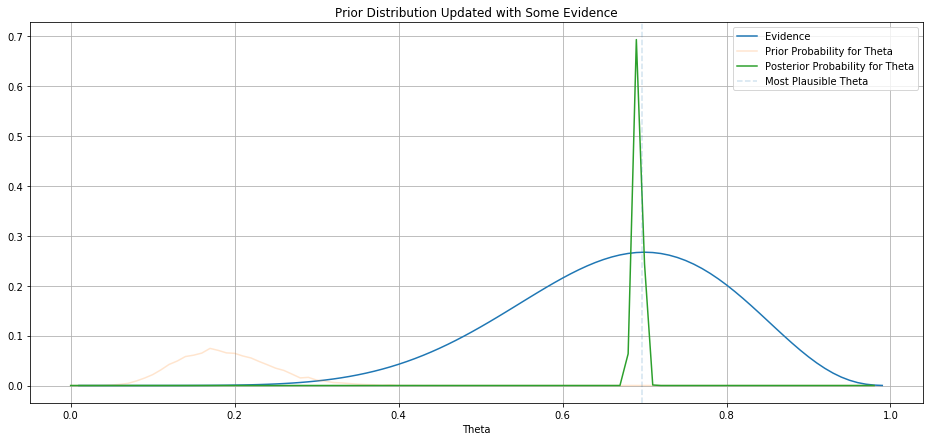

In [35]:
#plot the histogram of click through rates
plt.rcParams['figure.figsize'] = (16, 7)

#get histogram of samples from posterior distribution of CTRs
posterior_counts, posterior_bins = np.histogram(trace['prior'],
                                                bins=zero_to_one)

#normalized histogram
posterior_counts = posterior_counts / float(posterior_counts.sum())

#take the mean of the samples as most plausible value
most_plausible_theta = np.mean(trace['prior'])

#histogram of samples from prior distribution
prior_counts, bins = np.histogram(prior_samples,
                                  zero_to_one)
#normalize
prior_counts = [float(x)/prior_counts.sum() for x in prior_counts]

#plot
f, ax = plt.subplots(1)
ax.plot(possible_theta_values, likelihoods)
ax.plot(bins[:-1],prior_counts, alpha = .2)
ax.plot(bins[:-1],posterior_counts)
ax.axvline(most_plausible_theta, linestyle = "--", alpha = .2)
line1, line2, line3, line4 = ax.lines

ax.legend((line1, line2, line3, line4), ('Evidence'
                                         , 'Prior Probability for Theta'
                                         , 'Posterior Probability for Theta'
                                         , 'Most Plausible Theta'
                                        ), loc = 'upper right')
ax.set_xlabel("Theta")
ax.grid()
ax.set_title("Prior Distribution Updated with Some Evidence")
plt.show()

Now that we have a full distribution for the probability of various values of θ, we can take the mean of the distribution as our most plausible value for θ, which is about 0.27.

The data has caused us to believe that the true click-through rate is higher than we originally thought, but far lower than the 0.7 click-through rate observed so far from the facebook-yellow-dress campaign. Why is this the case? Note how wide our likelihood function is; it's telling us that there is a wide range of values of θ under which our data is likely. If the range of values under which the data were plausible were narrower, then our posterior would have shifted further. See what happens to the posterior if we observed a 0.7 click-through rate from 10, 100, 1,000, and 10,000 impressions:

In [29]:
#create our data:
traces = {}
for ad_impressions in [10, 1000, 10000]: #maintaining observed CTR of 0.7
    clicks = np.array([ctr * ad_impressions])    #re-estimate the posterior for
    impressions = np.array([ad_impressions])    #increasing numbers of impressions
    with pm.Model() as model:
        theta_prior = pm.Beta('prior', 11.5, 48.5)
        observations = pm.Binomial('obs',
                                   n = impressions,
                                   p = theta_prior,
                                   observed = clicks)
        start = pm.find_MAP()
        step = pm.NUTS()
        trace = pm.sample(1000,
                          step,
                          start=start,
                          progressbar=True)

        traces[ad_impressions] = trace

logp = -5.3618, ||grad|| = 4.4667: 100%|██████████| 7/7 [00:00<00:00, 448.00it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [prior]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:08<00:00, 356.33draws/s]
C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
logp = -610.91, ||grad|| = 507.72: 100%|██████████| 8/8 [00:00<00:00, 512.02it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [prior]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:08<00:00, 335.00draws/s]
logp = -6,096.4, ||grad|| = 5,082.7: 100%|██████████| 9/9 [00:00<00:00, 575.83it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [prior]
Sampling 2 chains: 100%|██████████| 3000/3000

In [33]:
f, ax = plt.subplots(1)
ax.plot(bins[:-1],prior_counts, alpha = .2)

counts = {}
for ad_impressions in [10, 1000, 10000]:
    trace = traces[ad_impressions]
    posterior_counts, posterior_bins = np.histogram(trace['prior'], bins=np.arange(0.01,1.0,0.01))
    posterior_counts = posterior_counts / float(len(trace))
    ax.plot(posterior_bins[:-1], posterior_counts)
    
    
line0, line1, line2, line3 = ax.lines

ax.legend((line0, line1, line2, line3,), ('Prior Distribution',
                                          'Posterior after 10 Impressions',
                                          'Posterior after 100 Impressions',
                                          'Posterior after 10000 Impressions'))
ax.set_xlabel("Theta")
ax.axvline(ctr, linestyle = "--", alpha = .5)
ax.grid()
ax.set_ylabel("Probability of Theta")
ax.set_title("Posterior Shifts as Weight of Evidence Increases")
plt.show()

As we obtain more and more data, we are more certain that the 0.7 success rate is the true success rate. Conditioning on more data as we update our prior, the likelihood function begins to play a larger role in our ultimate assessment because the weight of the evidence gets stronger. This would be particularly useful in practice if we wanted a continuous, fair assessment of how our campaigns are performing without having to worry about overfitting to a small sample.

There are a lot of concepts are beyond the scope of this tutorial, but are important for doing Bayesian analysis successfully, such as how to choose a prior, which sampling algorithm to choose, determining if the sampler is giving us good samplers, or checking for sampler convergence. Hopefully this tutorial inspires you to continue exploring the fascinating world of Bayesian inference.  